Найти данные для кластеризации. Данные в группе не должны повторяться! Внимание, если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать

In [45]:
import pandas as pd

iris = pd.read_csv('IRIS.csv')

data = pd.DataFrame(iris)

data.drop(columns=['species'], axis=1, inplace=True)

data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.

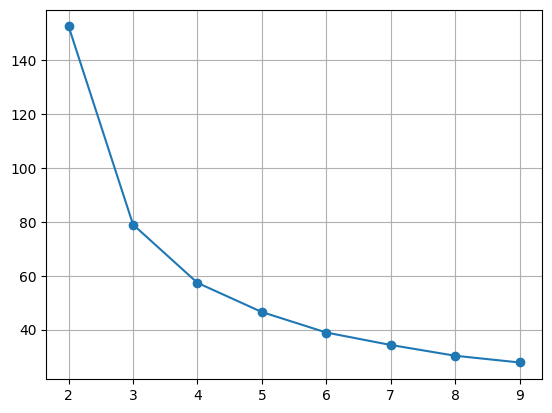

In [46]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

models = []
score1 = []
score2 = []
start_time = time.time()
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))

k_means_time = time.time() - start_time

plt.grid()
plt.plot(np.arange(2, 10), score1, marker = 'o')
plt.show()

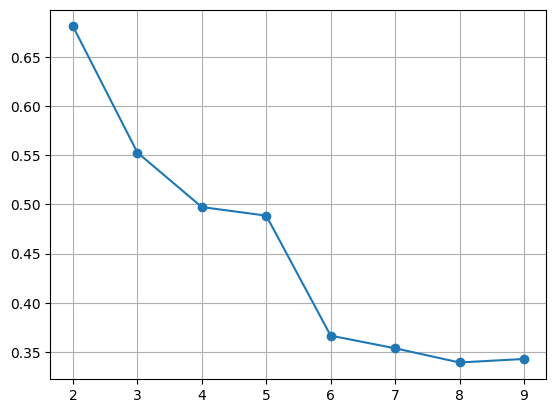

In [47]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker = 'o')
plt.show()

In [48]:
model1 = KMeans(n_clusters=6, random_state=123, init='k-means++')
model1.fit(data)
model1.cluster_centers_

array([[5.508     , 2.6       , 3.908     , 1.204     ],
       [4.725     , 3.13333333, 1.42083333, 0.19166667],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.26538462, 3.68076923, 1.50384615, 0.29230769]])

In [49]:
labels = model1.labels_
data['Claster'] = labels
data['Claster'].value_counts()

4    39
5    26
0    25
1    24
2    24
3    12
Name: Claster, dtype: int64

In [50]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=data['sepal_width'], y=data['sepal_length'], z=data['petal_length'], mode='markers', marker_color=data['Claster'])])
fig.show()

Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

In [51]:
from sklearn.cluster import AgglomerativeClustering

start_time = time.time()

model2 = AgglomerativeClustering(6, compute_distances=True)
clastering = model2.fit(data)
data['Claster'] = clastering.labels_
fig = go.Figure(data=[go.Scatter3d(x=data['sepal_width'], y=data['sepal_length'], z=data['petal_length'], mode='markers', marker_color=data['Claster'])])

hierarchical_clust = time.time() - start_time
fig.show()

Провести кластеризацию данных с помощью алгоритма DBSCAN

In [52]:
from sklearn.cluster import DBSCAN

start_time = time.time()

model3 = DBSCAN(eps=11, min_samples=5).fit(data)
data['Claster'] = model3.labels_

DBSCAN_clust = time.time() - start_time

fig = go.Figure(data=[go.Scatter3d(x=data['sepal_width'], y=data['sepal_length'], z=data['petal_length'], mode='markers', marker_color=data['Claster'])])
fig.show()

Сравнить скорость работы алгоритмов. Результаты изобразить в виде таблицы

In [54]:
df = pd.DataFrame({'name':['KMeans', 'hierarchical', 'DBSCAN'], 'time': [k_means_time, hierarchical_clust, DBSCAN_clust]})
df

,name,time
0,KMeans,1.443621
1,hierarchical,0.016015
2,DBSCAN,0.006997
